<a href="https://colab.research.google.com/github/raizelgestetner/ASL_fingerspelling/blob/main/ASL_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ASL net starts here***

In [32]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
!pip install tflite_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.3 MB/s eta 0:00:00


In [ ]:
import tflite_runtime.interpreter as tflite
import json
import pandas as pd
import numpy as np

In [ ]:
selected_columns = ["x_face_0", "x_face_61", "x_face_185", "x_face_40", "x_face_39", "x_face_37", "x_face_267", "x_face_269", "x_face_270", "x_face_409", "x_face_291", "x_face_146", "x_face_91", "x_face_181", "x_face_84", "x_face_17", "x_face_314", "x_face_405", "x_face_321", "x_face_375", "x_face_78", "x_face_191", "x_face_80", "x_face_81", "x_face_82", "x_face_13", "x_face_312", "x_face_311", "x_face_310", "x_face_415", "x_face_95", "x_face_88", "x_face_178", "x_face_87", "x_face_14", "x_face_317", "x_face_402", "x_face_318", "x_face_324", "x_face_308", "x_left_hand_0", "x_left_hand_1", "x_left_hand_2", "x_left_hand_3", "x_left_hand_4", "x_left_hand_5", "x_left_hand_6", "x_left_hand_7", "x_left_hand_8", "x_left_hand_9", "x_left_hand_10", "x_left_hand_11", "x_left_hand_12", "x_left_hand_13", "x_left_hand_14", "x_left_hand_15", "x_left_hand_16", "x_left_hand_17", "x_left_hand_18", "x_left_hand_19", "x_left_hand_20", "x_right_hand_0", "x_right_hand_1", "x_right_hand_2", "x_right_hand_3", "x_right_hand_4", "x_right_hand_5", "x_right_hand_6", "x_right_hand_7", "x_right_hand_8", "x_right_hand_9", "x_right_hand_10", "x_right_hand_11", "x_right_hand_12", "x_right_hand_13", "x_right_hand_14", "x_right_hand_15", "x_right_hand_16", "x_right_hand_17", "x_right_hand_18", "x_right_hand_19", "x_right_hand_20", "x_face_1", "x_face_2", "x_face_98", "x_face_327", "x_face_33", "x_face_7", "x_face_163", "x_face_144", "x_face_145", "x_face_153", "x_face_154", "x_face_155", "x_face_133", "x_face_246", "x_face_161", "x_face_160", "x_face_159", "x_face_158", "x_face_157", "x_face_173", "x_face_263", "x_face_249", "x_face_390", "x_face_373", "x_face_374", "x_face_380", "x_face_381", "x_face_382", "x_face_362", "x_face_466", "x_face_388", "x_face_387", "x_face_386", "x_face_385", "x_face_384", "x_face_398", "x_pose_12", "x_pose_14", "x_pose_16", "x_pose_18", "x_pose_20", "x_pose_22", "x_pose_11", "x_pose_13", "x_pose_15", "x_pose_17", "x_pose_19", "x_pose_21", "y_face_0", "y_face_61", "y_face_185", "y_face_40", "y_face_39", "y_face_37", "y_face_267", "y_face_269", "y_face_270", "y_face_409", "y_face_291", "y_face_146", "y_face_91", "y_face_181", "y_face_84", "y_face_17", "y_face_314", "y_face_405", "y_face_321", "y_face_375", "y_face_78", "y_face_191", "y_face_80", "y_face_81", "y_face_82", "y_face_13", "y_face_312", "y_face_311", "y_face_310", "y_face_415", "y_face_95", "y_face_88", "y_face_178", "y_face_87", "y_face_14", "y_face_317", "y_face_402", "y_face_318", "y_face_324", "y_face_308", "y_left_hand_0", "y_left_hand_1", "y_left_hand_2", "y_left_hand_3", "y_left_hand_4", "y_left_hand_5", "y_left_hand_6", "y_left_hand_7", "y_left_hand_8", "y_left_hand_9", "y_left_hand_10", "y_left_hand_11", "y_left_hand_12", "y_left_hand_13", "y_left_hand_14", "y_left_hand_15", "y_left_hand_16", "y_left_hand_17", "y_left_hand_18", "y_left_hand_19", "y_left_hand_20", "y_right_hand_0", "y_right_hand_1", "y_right_hand_2", "y_right_hand_3", "y_right_hand_4", "y_right_hand_5", "y_right_hand_6", "y_right_hand_7", "y_right_hand_8", "y_right_hand_9", "y_right_hand_10", "y_right_hand_11", "y_right_hand_12", "y_right_hand_13", "y_right_hand_14", "y_right_hand_15", "y_right_hand_16", "y_right_hand_17", "y_right_hand_18", "y_right_hand_19", "y_right_hand_20", "y_face_1", "y_face_2", "y_face_98", "y_face_327", "y_face_33", "y_face_7", "y_face_163", "y_face_144", "y_face_145", "y_face_153", "y_face_154", "y_face_155", "y_face_133", "y_face_246", "y_face_161", "y_face_160", "y_face_159", "y_face_158", "y_face_157", "y_face_173", "y_face_263", "y_face_249", "y_face_390", "y_face_373", "y_face_374", "y_face_380", "y_face_381", "y_face_382", "y_face_362", "y_face_466", "y_face_388", "y_face_387", "y_face_386", "y_face_385", "y_face_384", "y_face_398", "y_pose_12", "y_pose_14", "y_pose_16", "y_pose_18", "y_pose_20", "y_pose_22", "y_pose_11", "y_pose_13", "y_pose_15", "y_pose_17", "y_pose_19", "y_pose_21", "z_face_0", "z_face_61", "z_face_185", "z_face_40", "z_face_39", "z_face_37", "z_face_267", "z_face_269", "z_face_270", "z_face_409", "z_face_291", "z_face_146", "z_face_91", "z_face_181", "z_face_84", "z_face_17", "z_face_314", "z_face_405", "z_face_321", "z_face_375", "z_face_78", "z_face_191", "z_face_80", "z_face_81", "z_face_82", "z_face_13", "z_face_312", "z_face_311", "z_face_310", "z_face_415", "z_face_95", "z_face_88", "z_face_178", "z_face_87", "z_face_14", "z_face_317", "z_face_402", "z_face_318", "z_face_324", "z_face_308", "z_left_hand_0", "z_left_hand_1", "z_left_hand_2", "z_left_hand_3", "z_left_hand_4", "z_left_hand_5", "z_left_hand_6", "z_left_hand_7", "z_left_hand_8", "z_left_hand_9", "z_left_hand_10", "z_left_hand_11", "z_left_hand_12", "z_left_hand_13", "z_left_hand_14", "z_left_hand_15", "z_left_hand_16", "z_left_hand_17", "z_left_hand_18", "z_left_hand_19", "z_left_hand_20", "z_right_hand_0", "z_right_hand_1", "z_right_hand_2", "z_right_hand_3", "z_right_hand_4", "z_right_hand_5", "z_right_hand_6", "z_right_hand_7", "z_right_hand_8", "z_right_hand_9", "z_right_hand_10", "z_right_hand_11", "z_right_hand_12", "z_right_hand_13", "z_right_hand_14", "z_right_hand_15", "z_right_hand_16", "z_right_hand_17", "z_right_hand_18", "z_right_hand_19", "z_right_hand_20", "z_face_1", "z_face_2", "z_face_98", "z_face_327", "z_face_33", "z_face_7", "z_face_163", "z_face_144", "z_face_145", "z_face_153", "z_face_154", "z_face_155", "z_face_133", "z_face_246", "z_face_161", "z_face_160", "z_face_159", "z_face_158", "z_face_157", "z_face_173", "z_face_263", "z_face_249", "z_face_390", "z_face_373", "z_face_374", "z_face_380", "z_face_381", "z_face_382", "z_face_362", "z_face_466", "z_face_388", "z_face_387", "z_face_386", "z_face_385", "z_face_384", "z_face_398", "z_pose_12", "z_pose_14", "z_pose_16", "z_pose_18", "z_pose_20", "z_pose_22", "z_pose_11", "z_pose_13", "z_pose_15", "z_pose_17", "z_pose_19", "z_pose_21"]

In [ ]:
def load_relevant_data_subset(pq_path):
    return pd.read_parquet(pq_path, columns=selected_columns)

In [37]:
frames = load_relevant_data_subset("/content/gdrive/MyDrive/ASL_fingerspelling_project/15_h_frames.parquet")

In [ ]:
!pwd

In [38]:
# for i in range(1,16):
#   frames = load_relevant_data_subset(f"/content/output_subset_1032110484_one_seq_{i}.parquet")
interpreter = tflite.Interpreter("/content/gdrive/MyDrive/ASL_fingerspelling_project/model.tflite")

REQUIRED_SIGNATURE = "serving_default"
REQUIRED_OUTPUT = "outputs"

with open ("/content/gdrive/MyDrive/ASL_fingerspelling_project/character_to_prediction_index.json", "r") as f:
    character_map = json.load(f)
rev_character_map = {j:i for i,j in character_map.items()}

found_signatures = list(interpreter.get_signature_list().keys())

if REQUIRED_SIGNATURE not in found_signatures:
    raise KernelEvalException('Required input signature not found.')

prediction_fn = interpreter.get_signature_runner("serving_default")

output = prediction_fn(inputs=frames)
# output = prediction_fn(inputs=cuted_frames)

prediction_str = "".join([rev_character_map.get(s, "") for s in np.argmax(output[REQUIRED_OUTPUT], axis=1)])
print (prediction_str)

2 a-e -aroe


In [ ]:
prediction_str

'with his tyle'

In [ ]:
output["outputs"].shape

(27, 63)

# **media pipe starts here**

In [22]:
!pip install mediapipe

In [23]:
import cv2
import numpy as np
import mediapipe as mp

NameError: name 'audio_classifier' is not defined

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

NameError: name 'mp' is not defined

**becouse we on colab, need special way to open the web cam.**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

lets take one pic for example. serial of pictaures is a "movie"

<IPython.core.display.Javascript object>

Saved to frame_0.jpg


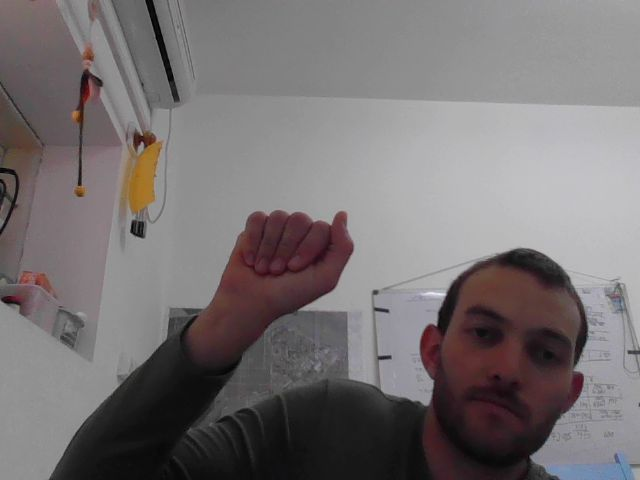

In [ ]:
from IPython.display import Image
for i in range(1):
  try:
    filename = take_photo(filename = f"frame_{i}.jpg")
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

lets see our picture, to make sure its OK and debug

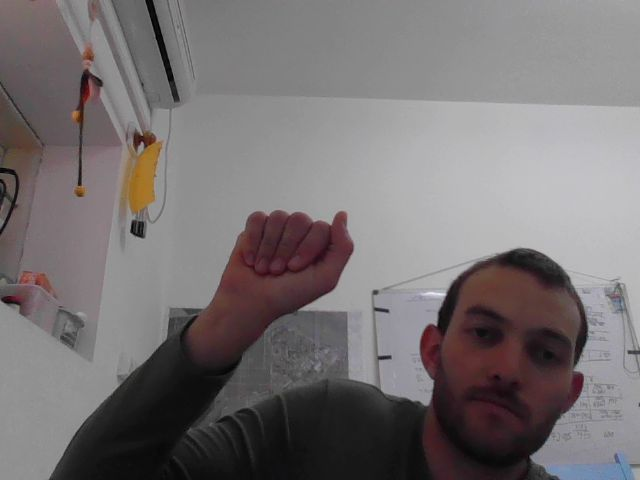

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('frame_0.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
import pandas as pd

lets run our one photo.

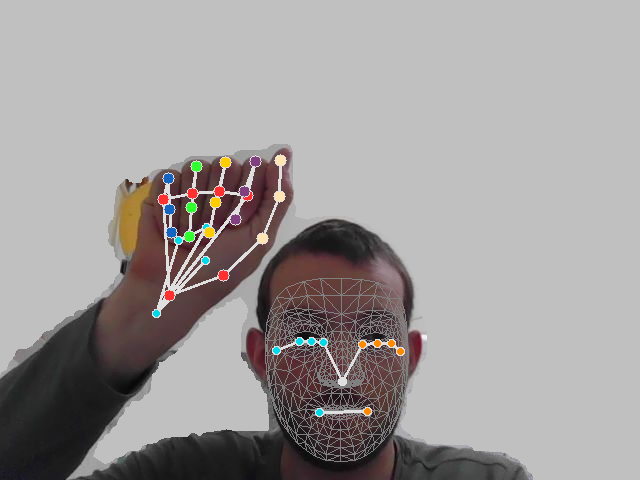

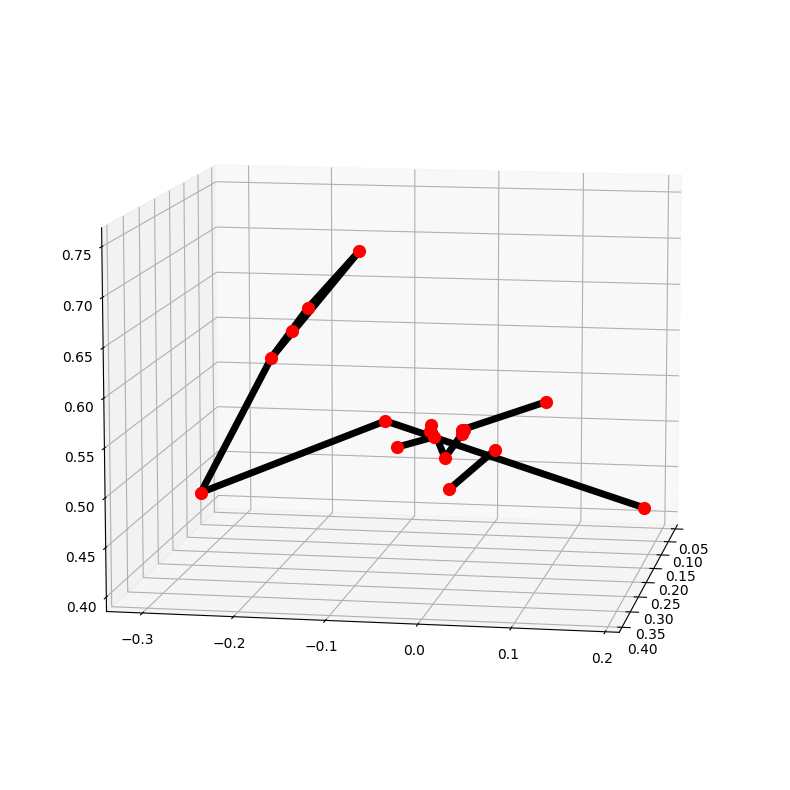

ValueError: Invalid category: x

In [ ]:
# For static images:
# IMAGE_FILES = ["frame_1.jpg", "frame_2.jpg", "frame_3.jpg", "frame_4.jpg", "frame_5.jpg", "frame_6.jpg", "frame_7.jpg", "frame_8.jpg", "frame_9.jpg", "frame_10.jpg", "frame_11.jpg", "frame_12.jpg", "frame_13.jpg", "frame_14.jpg"]
IMAGE_FILES = ["frame_1.jpg"]
BG_COLOR = (192, 192, 192) # gray

# Create an empty DataFrame to store the results
# columns = ["image_id", "landmark_id", "x", "y", "visibility"]
# df = pd.DataFrame(columns=columns)

with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # if results.pose_landmarks:
    #   face_landmarks = results.face_landmarks.landmark
    #   left_hand_landmarks = results.left_hand_landmarks.landmark
    #   pose_landmarks = results.pose_landmarks.landmark
    #   right_hand_landmarks = results.right_hand_landmarks.landmark

      # Create a Pandas DataFrame
      # df = pd.DataFrame({
      #     'frame': [idx],  # Add a column for frame index
      #     'face_landmarks': [face_landmarks],
      #     'left_hand_landmarks': [left_hand_landmarks],
      #     'pose_landmarks': [pose_landmarks],
      #     'right_hand_landmarks': [right_hand_landmarks]
      # })

#       # Write DataFrame to Parquet file
#       if idx == 0:
#           df.to_parquet('landmarks_data.parquet', index=False)
#       else:
#           df.to_parquet('landmarks_data.parquet', mode='append', index=False)


# # Write the DataFrame to a Parquet file
# # df.to_parquet("/content/landmarks.parquet", index=False)
# df_parquet = pd.read_parquet("/content/landmarks_data.parquet")

# df_parquet.to_csv("/content/landmarks_data.csv", index=False)

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose, left and right hands, and face landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_hand_landmarks_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_hand_landmarks_style())
    cv2.imwrite('annotated_image' + str(idx) + '.png', annotated_image)
    # img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
    cv2_imshow(annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)


# Create a list to store the data
  data_list = []

    # Extract the selected landmarks and their coordinates
  landmark_data = []
  for column in selected_columns:
      category, _, landmark = column.split('_')

      if category == 'pose':
          x, y, z = results.pose_landmarks.landmark[int(landmark)].x, results.pose_landmarks.landmark[int(landmark)].y, results.pose_landmarks.landmark[int(landmark)].z
      elif category == 'face':
          x, y, z = results.face_landmarks.landmark[int(landmark)].x, results.face_landmarks.landmark[int(landmark)].y, results.face_landmarks.landmark[int(landmark)].z
      elif category == 'left_hand':
          x, y, z = results.left_hand_landmarks.landmark[int(landmark)].x, results.left_hand_landmarks.landmark[int(landmark)].y, results.left_hand_landmarks.landmark[int(landmark)].z
      elif category == 'right_hand':
          x, y, z = results.right_hand_landmarks.landmark[int(landmark)].x, results.right_hand_landmarks.landmark[int(landmark)].y, results.right_hand_landmarks.landmark[int(landmark)].z
      else:
          raise ValueError(f"Invalid category: {category}")

      landmark_data.extend([x, y, z])

  data_list.append(landmark_data)

  # Create a DataFrame from the data list
  columns = [f'{category}_{coordinate}' for category in selected_columns for coordinate in ['x', 'y', 'z']]
  df = pd.DataFrame(data_list, columns=columns)

  # Save the DataFrame to a Parquet file
  df.to_parquet('output.parquet', index=False)

this is for live segmantation, dousnt work on colab... will work on the local computer

In [ ]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_hand_landmarks_style())
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_hand_landmarks_style())
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())

    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()